# Text Summarization of After Twenty Years by O' Henry and Text Summarization of the first section of the Wikipedia article on Oscar Wilde using fine-tuned pre-trained BERT model for extractive summarization in each case (bert-extractive-summarizer) http://www.gutenberg.org/cache/epub/2776/pg2776.txt

In [1]:
from summarizer import Summarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wikipedia
import re

# After Twenty Years by O'Henry

In [2]:
file_url_after_twenty=r'.\data\ohenry\pg2776.txt'
with open(file_url_after_twenty, 'r') as f:
        contents = f.read()
contents

'ï»¿The Project Gutenberg eBook, The Four Million, by O. Henry\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\n\n\n\nTitle: The Four Million\n\nAuthor: O. Henry\n\nRelease Date: August, 2001  [eBook #2776]\nMost recently updated: July 7, 2019\n\nEdition: 11\n\nLanguage: English\n\n\n***START OF THE PROJECT GUTENBERG EBOOK THE FOUR MILLION***\n\n\nE-text prepared by Project Gutenberg volunteers\nand revised by Joseph E. Loewenstein, M.D.\n\n\n\nTHE FOUR MILLION\n\nby\n\nO. HENRY\n\n\n\n\n\n\n\nNot very long ago some one invented the assertion that there were\nonly "Four Hundred" people in New York City who were really worth\nnoticing. But a wiser man has arisen--the census taker--and his\nlarger estimate of human interest has been preferred in marking out\nthe field of these l

In [3]:
start_string='AFTER TWENTY YEARS\n\n\n'
end_string='\n\n\n\n\n\nLOST ON DRESS PARADE'
text_after_twenty=contents[contents.find(start_string):contents.find(end_string)]
text_after_twenty=text_after_twenty.replace('\n',' ')
text_after_twenty=re.sub(r"\s+"," ",text_after_twenty)
text_after_twenty

'AFTER TWENTY YEARS The policeman on the beat moved up the avenue impressively. The impressiveness was habitual and not for show, for spectators were few. The time was barely 10 o\'clock at night, but chilly gusts of wind with a taste of rain in them had well nigh de-peopled the streets. Trying doors as he went, twirling his club with many intricate and artful movements, turning now and then to cast his watchful eye adown the pacific thoroughfare, the officer, with his stalwart form and slight swagger, made a fine picture of a guardian of the peace. The vicinity was one that kept early hours. Now and then you might see the lights of a cigar store or of an all-night lunch counter; but the majority of the doors belonged to business places that had long since been closed. When about midway of a certain block the policeman suddenly slowed his walk. In the doorway of a darkened hardware store a man leaned, with an unlighted cigar in his mouth. As the policeman walked up to him the man spoke

In [4]:
length=[]
sentences=text_after_twenty.split('.')
for sentence in sentences:
    length.append(len(sentence))

In [5]:
np.array(length)

array([ 77,  74, 132, 266,  43, 179,  76,  95,  59,  49,  31,  42, 109,
       104,  44,  23,  57, 106,  44, 143,  72,  36,  64,  91, 186, 134,
        52,  58, 108,  53,  96, 112,  19, 101,  85,  37,  71,  61,  45,
        56,  72,  35,  45,  55,  19,  40,  69,  37,  54,  17,  91, 111,
       131, 189, 159,  36,  41,  54,  90,  24,  63,  47,  96,  90,  27,
        56,  38,  46,  49,  94,  47, 107,  61,  65,  96,  60,  37,  95,
        69,  55,  96,  40,  74,  35,  26,  69,  96,  26,  44,  97,  92,
         6,   2])

In [6]:
bins=int(np.log2(len(length)))+1
bins

7

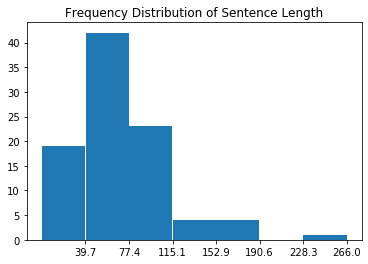

In [7]:
arr=np.array(length)
y,x = np.histogram(arr,bins=bins)
x_mid=[(x[i]+x[i+1])/2 for i in range(bins)]
x_right=[x[i+1] for i in range(bins)]
width=x[1]-x[0]
fig, ax = plt.subplots()
plt.bar(x_mid,y, width=width*0.99,align='center')
plt.title('Frequency Distribution of Sentence Length')
plt.xticks(ticks=x_right)
plt.show()

In [8]:
pd.Series(length).quantile(0.1),pd.Series(length).quantile(0.9)

(27.800000000000004, 111.8)

In [9]:
model = Summarizer(hidden=-2,random_state=12345)

In [10]:
summary_text_after_twenty=model(text_after_twenty,min_length=0,ratio=0.20)

In [11]:
print(summary_text_after_twenty)

AFTER TWENTY YEARS The policeman on the beat moved up the avenue impressively. When about midway of a certain block the policeman suddenly slowed his walk. It's all right, officer," he said, reassuringly. " You couldn't have dragged Jimmy out of New York; he thought it was the only place on earth. You see, the West is a pretty big proposition, and I kept hustling around over it pretty lively. But I know Jimmy will meet me here if he's alive, for he always was the truest, stanchest old chap in the world. asked the policeman. " He was a kind of plodder, though, good fellow as he was. I've had to compete with some of the sharpest wits going to get my pile. I should say not!" I'll give him half an hour at least. Good-night, sir," said the policeman, passing on along his beat, trying doors as he went. There was now a fine, cold drizzle falling, and the wind had risen from its uncertain puffs into a steady blow. Is that you, Bob?" Moderately. The man from the West stopped suddenly and releas

In [12]:
summary_text_after_twenty=model(text_after_twenty,min_length=0,ratio=0.25)

In [13]:
print(summary_text_after_twenty)

AFTER TWENTY YEARS The policeman on the beat moved up the avenue impressively. The vicinity was one that kept early hours. In the doorway of a darkened hardware store a man leaned, with an unlighted cigar in his mouth. It's an appointment made twenty years ago. Sounds a little funny to you, doesn't it? His scarfpin was a large diamond, oddly set. " You couldn't have dragged Jimmy out of New York; he thought it was the only place on earth. Haven't you heard from your friend since you left?" " You see, the West is a pretty big proposition, and I kept hustling around over it pretty lively. But I know Jimmy will meet me here if he's alive, for he always was the truest, stanchest old chap in the world. asked the policeman. " He was a kind of plodder, though, good fellow as he was. It takes the West to put a razor-edge on him." I'll be on my way. So long, officer." " he asked, doubtfully. " Is that you, Jimmy Wells?" exclaimed the new arrival, grasping both the other's hands with his own. " 

# Wikipedia article on Oscar Wilde (summary section)

In [24]:
#text_wiki_oscarwilde=wikipedia.summary("Oscar Wilde")
file_url_wiki_oscarwilde=r'.\data\oscarwilde\ow_wikipedia_sum.txt'
with open(file_url_wiki_oscarwilde, 'r') as f:
        text_wiki_oscarwilde = f.read()
text_wiki_oscarwilde=text_wiki_oscarwilde.replace('\n',' ')
text_wiki_oscarwilde=re.sub(r"\s+"," ",text_wiki_oscarwilde)
text_wiki_oscarwilde

'Oscar Fingal O\'Flahertie Wills Wilde (16 October 1854 – 30 November 1900) was an Irish poet and playwright. After writing in different forms throughout the 1880s, the early 1890s saw him become one of the most popular playwrights in London. He is best remembered for his epigrams and plays, his novel The Picture of Dorian Gray, and the circumstances of his criminal conviction for "gross indecency", imprisonment, and early death at age 46. Wilde\'s parents were successful Anglo-Irish intellectuals in Dublin. A young Wilde learned to speak fluent French and German. At university, Wilde read Greats; he demonstrated himself to be an exceptional classicist, first at Trinity College Dublin, then at Oxford. He became associated with the emerging philosophy of aestheticism, led by two of his tutors, Walter Pater and John Ruskin. After university, Wilde moved to London into fashionable cultural and social circles. As a spokesman for aestheticism, he tried his hand at various literary activitie

In [25]:
length=[]
sentences=text_wiki_oscarwilde.split('.')
for sentence in sentences:
    length.append(len(sentence))

In [26]:
np.array(length)

array([106, 132, 200,  68,  56, 139, 122,  85, 292, 140, 240, 128, 179,
       149, 189,  66, 138, 134, 226,  86, 124,   0])

In [27]:
bins=int(np.log2(len(length)))+1
bins

5

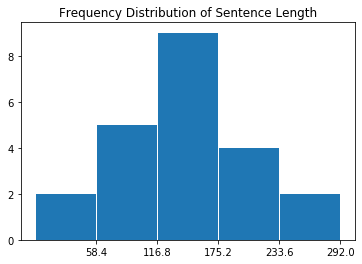

In [28]:
arr=np.array(length)
y,x = np.histogram(arr,bins=bins)
x_mid=[(x[i]+x[i+1])/2 for i in range(bins)]
x_right=[x[i+1] for i in range(bins)]
width=x[1]-x[0]
fig, ax = plt.subplots()
plt.bar(x_mid,y, width=width*0.99,align='center')
plt.title('Frequency Distribution of Sentence Length')
plt.xticks(ticks=x_right)
plt.show()

In [29]:
pd.Series(length).quantile(0.1),pd.Series(length).quantile(0.9)

(66.2, 223.40000000000006)

In [30]:
summary_wiki_oscarwilde=model(text_wiki_oscarwilde,min_length=0,ratio=0.20)

In [31]:
print(summary_wiki_oscarwilde)

Oscar Fingal O'Flahertie Wills Wilde (16 October 1854 – 30 November 1900) was an Irish poet and playwright. After university, Wilde moved to London into fashionable cultural and social circles. At the turn of the 1890s, he refined his ideas about the supremacy of art in a series of dialogues and essays, and incorporated themes of decadence, duplicity, and beauty into what would be his only novel, The Picture of Dorian Gray (1890). Unperturbed, Wilde produced four society comedies in the early 1890s, which made him one of the most successful playwrights of late-Victorian London.


In [32]:
summary_wiki_oscarwilde=model(text_wiki_oscarwilde,min_length=0,ratio=0.25)

In [33]:
print(summary_wiki_oscarwilde)

Oscar Fingal O'Flahertie Wills Wilde (16 October 1854 – 30 November 1900) was an Irish poet and playwright. He became associated with the emerging philosophy of aestheticism, led by two of his tutors, Walter Pater and John Ruskin. After university, Wilde moved to London into fashionable cultural and social circles. At the turn of the 1890s, he refined his ideas about the supremacy of art in a series of dialogues and essays, and incorporated themes of decadence, duplicity, and beauty into what would be his only novel, The Picture of Dorian Gray (1890). The opportunity to construct aesthetic details precisely, and combine them with larger social themes, drew Wilde to write drama.
